# Import Libraries

In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

pd.set_option('max_columns', 14)

%matplotlib inline

## Load dataset

In [65]:
house = pd.read_csv(r'C:\\Users\\Benai\\Documents\\machin-learning\\knn\\house.csv')

In [66]:
house.shape

(63023, 13)

In [67]:
house.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [68]:
# printing the shape of the database
house.shape

(63023, 13)

In [69]:
# print some few imformation about database
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [70]:
# print descriptive statistic on numerical columns
house.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [71]:
# check missing values
house.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [72]:
# covert date to datatime object
# house['Date'] = pd.to_datetime(house['Date'])

In [73]:
# print some few imformation about database
house['Date'].dtype

dtype('O')

In [74]:
house['Price'].agg(['mean', 'median'])

mean      997898.241488
median    830000.000000
Name: Price, dtype: float64

In [75]:
# replace the missing valuw wiht the mean value
house['Price']  = house['Price'].fillna(house['Price'].mean())

In [76]:
house['Price'].isna().sum()

0

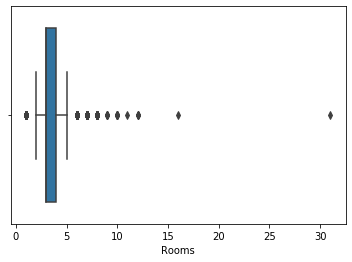

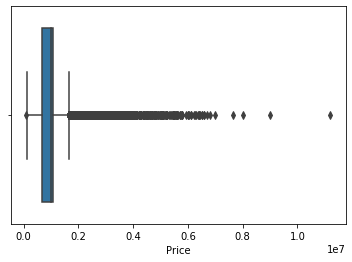

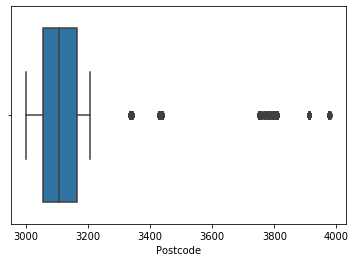

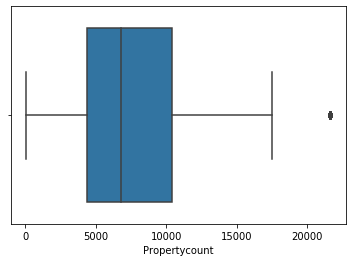

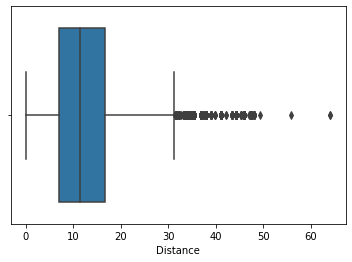

In [77]:
# checking for outliers 

cols = [cols for cols in house.columns if house[cols].dtype != 'O']

for col in cols:
    if col != 'Date':
        sns.boxplot(house[col])
        plt.show()

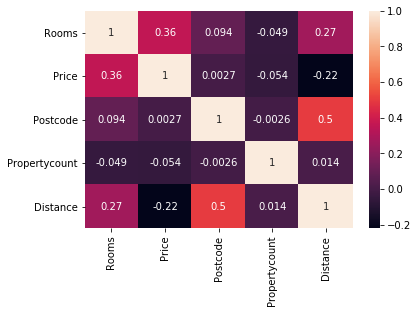

In [78]:
# find out the correlatoin
sns.heatmap(house.corr(), annot=True)

In [79]:
# convert numeric to categorical variable

colss = [cols for cols in house.columns if house[cols].dtype == 'O']

la = LabelEncoder()

for c in colss:
    print(house[c].dtype)
    house[c] = la.fit_transform(house[c])

house.head()

object
object
object
object
object
object
object
object


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,0,42390,3,0,1490000.0,2,198,0,3067,2,4019,3.0,32
1,0,46855,3,0,1220000.0,2,255,0,3067,2,4019,3.0,32
2,0,8180,3,0,1420000.0,2,286,0,3067,2,4019,3.0,32
3,1,50133,3,0,1515000.0,2,28,0,3040,6,1543,7.5,22
4,2,57182,2,0,670000.0,2,286,0,3042,6,3464,10.4,22


In [80]:
house[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          63023 non-null  int64  
 1   Price          63023 non-null  float64
 2   Postcode       63023 non-null  int64  
 3   Propertycount  63023 non-null  int64  
 4   Distance       63023 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 2.4 MB


In [ ]:
# check the distribution of the data

cols = [cols for cols in house.columns if house[cols].dtype != 'O']

for c in cols:
    sns.distplot(house[c])
    plt.show()

In [47]:
house.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [48]:
# predictor and target variable

y = house['Price']
x = house.drop('Price', axis=1)

In [89]:
# feture scale the data
scale = MinMaxScaler()
x = scale.fit_transform(x)

In [90]:
# Train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [91]:
# model training and fitting

knn = KNeighborsRegressor(n_neighbors=7)

knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [92]:
y_predict = knn.predict(x_test)

In [94]:
# Evaluation the model

print('R squared:', r2_score(y_test, y_predict))
print('Mean square error:', mean_squared_error(y_test, y_predict))
print('Mean absolute error:', mean_absolute_error(y_test, y_predict))
print('Root Mean square error:', np.sqrt(mean_squared_error(y_test, y_predict)))

R squared: 0.36503254400927543
Mean square error: 166273739342.5273
Mean absolute error: 260119.29030492957
Root Mean square error: 407766.7707679567


In [95]:
# finding the best k

k_value = range(1,25)

# score
score = []

for k in k_value:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    score.append(r2_score(y_test, y_predict))
    
    print(k, '--->',r2_score(y_test, y_predict))

1 ---> -0.04402724238264977
2 ---> 0.18777406140964414
3 ---> 0.27338407799964437
4 ---> 0.31824896460588514
5 ---> 0.3449457561130379
6 ---> 0.3561401937860439
7 ---> 0.36503254400927543
8 ---> 0.370792129548132
9 ---> 0.37368594690568224
10 ---> 0.37752315509519974
11 ---> 0.37926209450888426
12 ---> 0.3800024265026529
13 ---> 0.3812146203297513
14 ---> 0.3804841590191109
15 ---> 0.38061963467485427
16 ---> 0.38051771302099024
17 ---> 0.37895726468776125
18 ---> 0.3789486127115853
19 ---> 0.37962465794884104
20 ---> 0.3801816536172651
21 ---> 0.38138202194271154
22 ---> 0.3808526046567826
23 ---> 0.3802043888124136
24 ---> 0.37888694571123593


In [98]:
# feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [99]:
feature_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

feature_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [100]:
feature_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [105]:
knn = KNeighborsRegressor(n_neighbors=14)

knn.fit(x_train, y_train)

y_predict_2 = knn.predict(x_test)

In [106]:
# Evaluation the model

print('R squared:', r2_score(y_test, y_predict_2))
print('Mean square error:', mean_squared_error(y_test, y_predict_2))
print('Mean absolute error:', mean_absolute_error(y_test, y_predict_2))
print('Root Mean square error:', np.sqrt(mean_squared_error(y_test, y_predict_2)))

R squared: 0.3804841590191109
Mean square error: 162227551175.9892
Mean absolute error: 260176.18695252115
Root Mean square error: 402774.81447576784
